# Determining an Average Meteorological Year

This notebook calculates an hourly time series for an average meteorological year (AMY) for a given location, representing the mean weather conditions for a one-year period. This was designed to provide a similar product to a [Typical Meteorological Year](https://nsrdb.nrel.gov/data-sets/tmy), an hourly dataset used for applications in energy and building systems modeling. Because this represents average rather than extreme conditions, an AMY dataset is not suited for designing systems to meet the worst-case conditions occurring at a location.

In the Cal-Adapt: Analytics Engine, there are three options for investigating AMY:  
1. Absolute AMY: represents the historical reference period (1981-2010) or a future reference period based around a 30-year warming level time window. **Note: Absolute AMY data and display is not bias corrected, and should be used for visual data inspection only.**
2. Difference AMY: represents the difference between a designated future 30-year period and the historical baseline (1981-2010)
3. Severe meteorological year: represents the difference between the 90th percentile for a designated future 30-year period and the historical baseline (1981-2010)


**Intended Application**: As a user, I want to **<span style="color:#FF0000">analyze the average weather conditions</span>** of a region of interest by:
1. Computing the average weather conditions
2. Visualize average conditions throughout the year in a heatmap

**Note**: An update on the AMY methodology to be more consistent with the *Typical Meteorological Year* method is forthcoming, and will eventually replace the AMY calculation. For progress, check out `amy_to_tmy.ipynb` notebook!

**Runtime**: With the default settings, this notebook takes approximately **5 minutes** to run from start to finish. Modifications to selections may increase the runtime.

## Step 0: Setup

Import the [climakitae](https://github.com/cal-adapt/climakitae) library and other dependencies.

In [11]:
%config InlineBackend.figure_format = 'svg' # Make plots look better in the notebook environment 

from climakitaegui.explore.amy import lineplot_from_amy_data
from climakitae.explore.amy import compute_amy, compute_severe_yr

import climakitae as ck
import climakitaegui as ckg
import pandas as pd

## Step 1: Explore the Average Meteorological Year

The below panel can be used to explore an AMY for a particular variable and geographic area of interest during the historical period, as well as comparisons to an AMY under future conditions at different global warming levels (for more information about warming levels, see the `explore_warming.ipynb` notebook). 

The absolute AMY for a given 30-year period (either the historical period 1981-2010, or a thirty year window centered on where each GCM simulation reaches the specified global warming level) is calculated by identifying for each hour the hourly value that is closest to the mean hourly value across all years to produce a full annual timeseries of hourly data for a variable of interest that best represents the average conditions.

An absolute AMY for the historical period can then be compared to an AMY under different warming levels, and the difference in hourly values of a given variable for an AMY under historical conditions and future conditions can be plotted using the "Difference" button.

The resulting heatmap of AMY values for a full annual timeseries is then plotted, with day of year 1 being January 1st and hour of day given in Pacific Standard Time. A static version of the plot can be saved by using the save button in the lower right of the plot window.

To learn more about the data available on the Analytics Engine, [see our data catalog](https://analytics.cal-adapt.org/data/). 

<span style="color:#FF0000">

**Note:** Once you have selected the options you would like to investigate, please select the "Reload Data" button. It will take 2-4 minutes to update, hang tight!

Column
    [0] Row
        [0] Card(collapsible=False, styles={'header_background': 'lig...}, title=' How do you w..., width=550)
            [0] Row
                [0] Column(width=250)
                    [0] StaticText(value='Average Meteorological Y...)
                    [1] RadioButtonGroup(name='Amy type', options=OrderedDict({'Absolute': '...]), value='Absolute', width=225)
                    [2] Select(name='Computation Options', options=OrderedDict({'Historical':...]), value='Historical', width=225)
                    [3] StaticText(value='AMY computed u...)
                    [4] StaticText(value='Warming level (°C)')
                    [5] RadioButtonGroup(name='Warmlevel', options=OrderedDict({'1.5': 1.5, ...]), value=1.5, width=225)
                    [6] Select(name='Data variable', options=OrderedDict({'Air Temperat...]), value='Air Temperature at 2m', width=225)
                    [7] StaticText(value='Temperature o...)
                    [8] StaticText(value='Variable Units')
                    [9] RadioButtonGroup(name='Units', options=OrderedDict({'K': 'K', ...]), value='K', width=225)
                    [10] StaticText(value='Model Resolution')
                    [11] RadioButtonGroup(name='Resolution', options=OrderedDict({'3 km': '3 km...]), value='45 km', width=225)
                [1] Column(width=270)
                    [0] Select(name='Subset the data by...', options=OrderedDict({'none': 'none...]), value='CA counties', width=225)
                    [1] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5, width=225)
                    [2] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5, width=225)
                    [3] MultiSelect(name='Location selection', options=OrderedDict({'Alameda Coun...]), value=['Los Angeles County'], width=225)
                    [4] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                    [5] Button(button_type='primary', height=30, name='Reload Data', sizing_mode='fixed', width=150)
        [1] Card(collapsible=False, styles={'header_background': 'lig...}, title=' Average Meteorological Y..., width=725)
            [0] Tabs
                [0] ParamMethod(method, _pane=HoloViews, defer_load=False, name='AMY Heatmap')
                [1] Column
                    [0] StaticText(value="An average meteorological..., width=700)
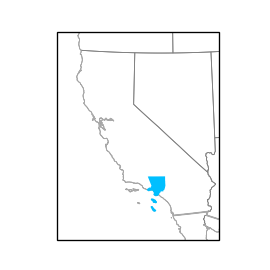

In [12]:
from climakitaegui.explore import amy

amy = amy()
amy.show()

## Step 2: Application

Examining a particular month within the Average Meteorological Year can provide hourly information that could inform energy usage analysis. For example, a warm season month can be used to examine cooling demand; while a cold season month can be used for exploring heating demand change under future climate conditions.

To analyze a specific month, we'll retrieve some of the absolute AMY data of interest shown above. Please select in the explore panel above 'Absolute' as your AMY Type, and either 'Historical' or 'Warming Level Future' with a warming level of your choosing. A progress bar is provided when running the cell below, as this step may take a little while. 

#### Retrieve and display the data
First, we'll read in the data from the catalog and simplify the dataset by reducing the simulation and scenario dimensions.

In [3]:
my_data = amy.retrieve() 
my_data = my_data.isel(simulation=0, scenario=0) 
display(my_data)

<xarray.DataArray 'Air Temperature at 2m' (time: 262800)> Size: 1MB
dask.array<getitem, shape=(262800,), dtype=float32, chunksize=(42907,), chunktype=numpy.ndarray>
Coordinates:
  * time               (time) datetime64[ns] 2MB 1981-01-01 ... 2010-12-31T23...
    Lambert_Conformal  int64 8B 0
    simulation         <U21 84B 'WRF_ensmean_r11i1p1f1'
    scenario           <U18 72B 'Historical Climate'
Attributes:
    variable_id:           t2
    extended_description:  Temperature of the air 2m above Earth's surface. T...
    units:                 K
    data_type:             Gridded
    resolution:            45 km
    frequency:             hourly
    location_subset:       ['Los Angeles County']
    approach:              Time
    downscaling_method:    Dynamical
    institution:           CAE
    grid_mapping:          Lambert_Conformal

#### Read the raw hourly data into memory 
First we read in the raw data that will be used to compute AMY in the next step. This step may take a while because the hourly data is quite large.

In [4]:
my_data = ck.load(my_data) 

Processing data to read 1.00 MB of data into memory... Complete!


#### Use the gridded data to compute the Average Meteorological Year
We can easily do this using the *climakitae* function `compute_amy`, which is also used under the hood in the panel generated by amy(). This step may take a while as well (approx 1-2 minutes).

In [ ]:
amy_data = compute_amy(my_data)
display(amy_data)

#### Visualize one month from the Average Meteorological Year 
First, we'll subset the dataframe to grab data for the month of January. You can change the month easily by changing the variable `month`; just make sure the value you is the shortened version of the month (i.e. "Jan" instead of "January") so that the code can find the substring in the `amy_data` object. 

In [ ]:
month = 'Jan'
one_month = amy_data[amy_data.index.str.match(month)] # Subset data for just one month 

Next, we'll use the *climakitae* function `lineplot_from_amy_data` to generate a lineplot of our final data. We'll use information about the user inputs to add a descriptive title to the lineplot. 

In [ ]:
lineplot_from_amy_data(
    one_month, 
    computation_method=amy.computation_method, # Historical or Warming Level Future  
    location_subset=amy.cached_area[0], # Location subset information 
    warmlevel=amy.warmlevel, # Warming level selection 
    variable=amy.variable+"("+amy.units+")" # Variable and units selected. 
)

#### Use the gridded data to compute the Severe Meteorological Year

We can also calculate the 90th percentile of data using the *climakitae* function `compute_severe_yr()`. This step may take a while as well (approx 1-2 minutes).

In [ ]:
severe_data = compute_severe_yr(my_data)
display(severe_data)

## Step 3: Export data

To export the Average Meteorological Year data, use the following code. Likewise, you can also export the Severe Meteorological Year by exporting the 'severe_data' variable instead of 'amy_data'.

In [ ]:
amy_data.to_csv('my_filename' + '.csv')

To export other data, call `export` and input your desired
1) data to export – an [xarray DataArray or Dataset](https://docs.xarray.dev/en/stable/user-guide/data-structures.html), as output by e.g. amy.retrieve()
2) output file name (without file extension)
3) file format ("NetCDF" or "CSV")

To learn more about the file format options, see [getting_started.ipynb](getting_started.ipynb).

As an example, the following code exports the data that is used to calculate the Average Meteorological Year (not the AMY result) to a NetCDF file named "my_filename".

In [ ]:
ck.export(my_data, "my_filename", "NetCDF")